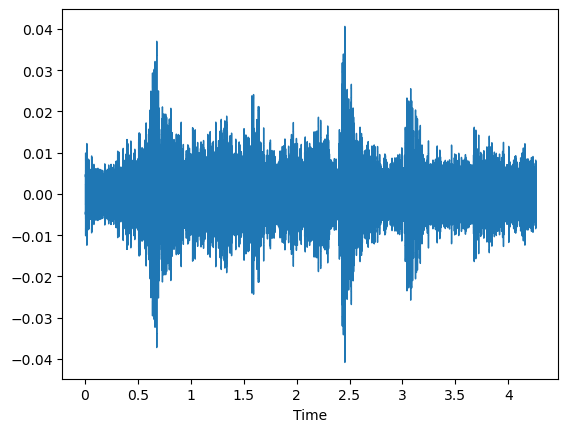

In [16]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
speech_signal , sr = librosa.load(r"C:\Users\Tarun\Documents\Sound Recordings\5 WORDS.wav")
librosa.display.waveshow(speech_signal)

In [17]:
Audio(data = speech_signal, rate = sr)

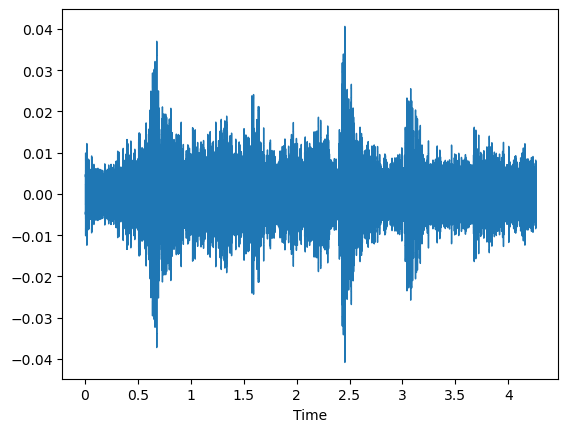

In [18]:
trimmed_signal , index = librosa.effects.trim(speech_signal, top_db = 20)
librosa.display.waveshow(trimmed_signal)

In [19]:
Audio(trimmed_signal, rate=sr)

In [20]:
print(librosa.get_duration(y=speech_signal, sr=sr), librosa.get_duration(y=trimmed_signal,sr=sr))

4.26 4.26


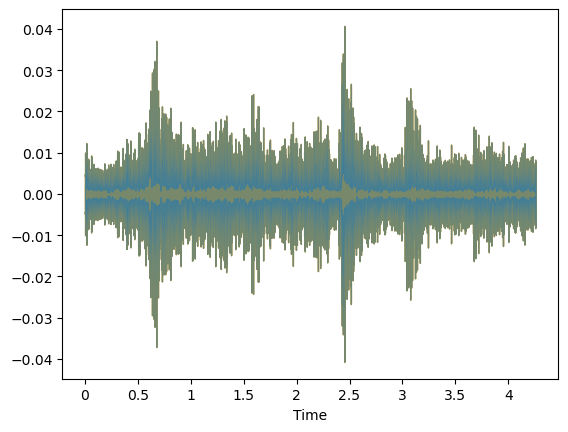

In [21]:
fig,ax = plt.subplots(nrows=1)
librosa.display.waveshow(speech_signal,label="Original_signal",color = "orange",alpha=1)
librosa.display.waveshow(trimmed_signal,label="Trimmed_signal", alpha=0.6)

In [31]:
split_signal= librosa.effects.split(y=speech_signal,top_db=10)
print(split_signal)

[[ 7680 39936]
 [40448 51712]
 [52736 61440]
 [66048 71168]
 [80896 82944]
 [83456 87040]]


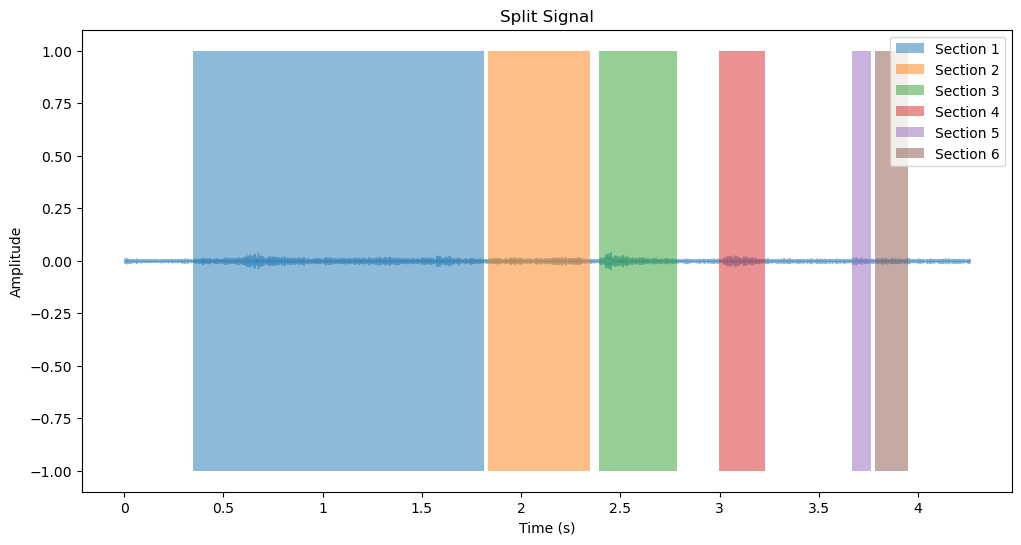

In [32]:
sections = librosa.effects.split(speech_signal, top_db=10)
plt.figure(figsize=(12, 6))
librosa.display.waveshow(speech_signal, sr=sr, alpha=0.5)
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

In [33]:
import soundfile as sf 
for i, section in enumerate(sections):
    # Extract the split segment
    split_segment = speech_signal[section[0]:section[1]]
    # Save the split segment as a separate audio file
    sf.write(f'split_segment_{i}.mp3', split_segment, sr)
    
    print(f"Split segment {i+1}: split_segment_{i}.mp3, Duration: {len(split_segment)/sr} seconds")
    Audio(f'split_segment_{i}.mp3')

Split segment 1: split_segment_0.mp3, Duration: 1.4628571428571429 seconds
Split segment 2: split_segment_1.mp3, Duration: 0.5108390022675737 seconds
Split segment 3: split_segment_2.mp3, Duration: 0.3947392290249433 seconds
Split segment 4: split_segment_3.mp3, Duration: 0.23219954648526078 seconds
Split segment 5: split_segment_4.mp3, Duration: 0.09287981859410431 seconds
Split segment 6: split_segment_5.mp3, Duration: 0.16253968253968254 seconds


In [34]:
# Display audio of specific split segments
for i in range(min(5, len(sections))):  
    audio_segment, _ = librosa.load(f'split_segment_{i}.mp3', sr=sr)
    display(Audio(data=audio_segment, rate=sr))